In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df_id = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/models/identity/pbmc_new_donor/metrics_new_donor.csv", index_col=0)
df_mean_1 = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/models/additive_model/pbmc_new_donor/mean_model_same_donor/metrics_mean_model_1.csv", index_col=0)
df_mean_2 = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/models/additive_model/pbmc_new_donor/mean_model_same_cytokine/metrics_mean_model_2.csv", index_col=0)
df_cf = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/metrics_new_donor/metrics_new_donor.csv")

In [4]:
dfs_id = []
for n in df_cf["num_cytokines_in_train"].unique():
    df_tmp = df_id.copy()
    df_tmp["num_cytokines_in_train"] = n
    dfs_id.append(df_tmp)

In [5]:
df_id_final = pd.concat(dfs_id)

In [6]:
df_cf["num_cytokines_in_train"].value_counts()

num_cytokines_in_train
33.0    360
9.0     360
65.0    360
2.0     360
17.0    360
3.0     360
5.0     360
1.0     120
81.0    120
Name: count, dtype: int64

In [7]:
df_mean_1["num_cytokines_in_train"].value_counts()

num_cytokines_in_train
9     360
33    360
3     360
5     360
17    360
65    360
2     360
81    120
Name: count, dtype: int64

In [8]:
df_mean_2["num_cytokines_in_train"].value_counts()

num_cytokines_in_train
9     360
33    360
3     360
5     360
17    360
65    360
2     360
1     120
81    120
Name: count, dtype: int64

In [9]:
df_id_final["num_cytokines_in_train"].value_counts()

num_cytokines_in_train
1.0     144
33.0    144
65.0    144
2.0     144
17.0    144
9.0     144
5.0     144
3.0     144
81.0    144
Name: count, dtype: int64

In [10]:
df_id_final["method"] = "id"
df_cf["method"] = "cf"
df_mean_1["method"] = "m1"
df_mean_2["method"] = "m2"
df = pd.concat((df_cf, df_id_final, df_mean_1, df_mean_2))
df["num_cytokines_in_train"] -= 1

<Axes: xlabel='num_cytokines_in_train', ylabel='ood_e_distance'>

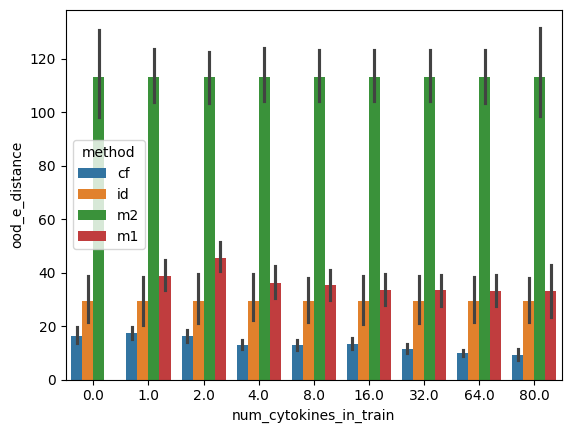

In [11]:
sns.barplot(df, x="num_cytokines_in_train", y="ood_e_distance", hue="method")

<Axes: xlabel='num_cytokines_in_train', ylabel='decoded_ood_r_squared'>

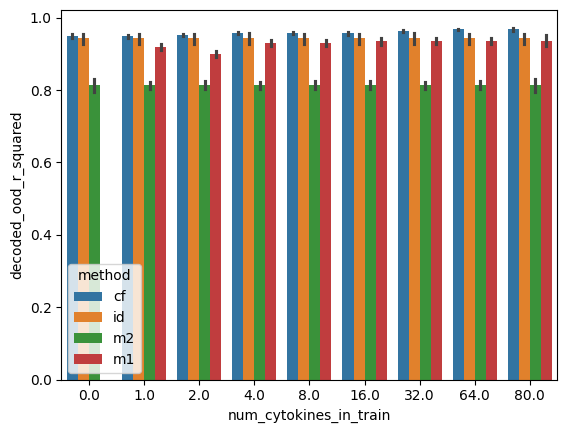

In [12]:
sns.barplot(df, x="num_cytokines_in_train", y="decoded_ood_r_squared", hue="method")

In [13]:
df_cf[df_cf["num_cytokines_in_train"]==1]["wandb_name"].value_counts()

wandb_name
northern-yogurt-332        10
faithful-leaf-336          10
ethereal-wind-331          10
glamorous-firefly-328      10
wild-snowball-326          10
wild-glade-335             10
fiery-dream-334            10
crimson-moon-325           10
blooming-universe-329      10
misunderstood-water-333    10
whole-pyramid-330          10
pretty-sponge-327          10
Name: count, dtype: int64

In [15]:
df_cf.shape

(2760, 176)

In [16]:
after = df_cf.drop_duplicates("decoded_ood_r_squared").index

In [17]:
dupl = set(df_cf.index)-set(after)
df_tmp = df_cf.loc[list(dupl)]

In [18]:
df_tmp = df_cf.loc[list(dupl)]

In [19]:
df_tmp["donor"]

2244    Donor1
1925    Donor7
1929    Donor1
2391    Donor5
2202    Donor4
Name: donor, dtype: object

In [20]:
df_tmp["cytokine"]

2244         M-CSF
1925     IFN-gamma
1929    IL-32-beta
2391          FasL
2202          ADSF
Name: cytokine, dtype: object

In [21]:
df_tmp["num_cytokines_in_train"]

2244     3.0
1925    65.0
1929    65.0
2391     9.0
2202     2.0
Name: num_cytokines_in_train, dtype: float64